### Model Creation

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
dataset = pd.read_csv("./MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
feature_list = dataset.columns.values
dataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
dataset.shape  
dataset = dataset.replace(np.inf,np.nan)    # replacing inf with nan
dataset = dataset.fillna(dataset.mean(numeric_only=True)) # ghen converting nan to mean values

In [6]:
X = dataset.iloc[:,:-1].values
print("shape of X",X.shape)

Y = dataset.iloc[:,-1].values
print("shape of Y",Y.shape)

shape of X (225745, 78)
shape of Y (225745,)


In [7]:
print("is NaN present:",np.any(np.isnan(X)))  # to check whether the array contains nan
print("is inf present:",np.any(np.isinf(X)))  # to check whether the array contains inf
X[X < 0] = 0   # to replace all negative values with zeros

is NaN present: False
is inf present: False


In [8]:
from sklearn.feature_selection import SelectKBest  # feature selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [9]:
bestfeatures = SelectKBest(score_func = mutual_info_classif, k=50)
fit = bestfeatures.fit(X,Y)
#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(feature_list)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_chi2']  
#print 50 best features
print(featureScores.nlargest(50,'Score_chi2')) 


                Selected_columns  Score_chi2
63             Subflow Fwd Bytes    0.652238
4    Total Length of Fwd Packets    0.651911
52           Average Packet Size    0.563848
5    Total Length of Bwd Packets    0.548497
65             Subflow Bwd Bytes    0.548483
12        Bwd Packet Length Mean    0.545096
54          Avg Bwd Segment Size    0.544006
55           Fwd Header Length.1    0.543691
34             Fwd Header Length    0.543250
0               Destination Port    0.538884
10         Bwd Packet Length Max    0.529670
66        Init_Win_bytes_forward    0.499293
53          Avg Fwd Segment Size    0.489654
8         Fwd Packet Length Mean    0.489348
6          Fwd Packet Length Max    0.486610
35             Bwd Header Length    0.475645
23                   Fwd IAT Max    0.459468
20                 Fwd IAT Total    0.457194
21                  Fwd IAT Mean    0.447470
62           Subflow Fwd Packets    0.409703
2              Total Fwd Packets    0.409693
22        

In [10]:
# print(featureScores.nlargest(50,'Score_chi2').Selected_columns.values)
featureScore_after_filter = featureScores.nlargest(50,'Score_chi2')
print(featureScore_after_filter.index[0])
count = 0
ind = []
for i in featureScore_after_filter.Score_chi2:
    if i < 0.2:
        ind.append(featureScore_after_filter.index[count])
    count = count + 1
featureScore_after_filter = featureScore_after_filter.drop(ind,axis = 0)  # contains all the filtered features
X = pd.DataFrame(X)
X = X.loc[:,featureScore_after_filter.index] # contains data after filter from feature selection
print(X)

63
          63    4    52   5    65   12   54    55    34       0   ...  \
0       12.0  12.0  9.0  0.0  0.0  0.0  0.0  40.0  40.0  54865.0  ...   
1        6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  55054.0  ...   
2        6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  55055.0  ...   
3        6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  46236.0  ...   
4       12.0  12.0  9.0  0.0  0.0  0.0  0.0  40.0  40.0  54863.0  ...   
...      ...   ...  ...  ...  ...  ...  ...   ...   ...      ...  ...   
225740   6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  61374.0  ...   
225741   6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  61378.0  ...   
225742   6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  61375.0  ...   
225743  12.0  12.0  9.0  0.0  0.0  0.0  0.0  40.0  40.0  61323.0  ...   
225744   6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  61326.0  ...   

                   36   39     1             14   11     18   17  \
0       666666.666700  6.0    3.0  4.000000e+06  0.0

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y= LabelEncoder()  
Y = labelencoder_y.fit_transform(Y)  

### Training of the Model

In [12]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler  # scaling of the data

scaler_X = StandardScaler()
x_train_scaled = scaler_X.fit_transform(x_train) # preprocessed training data
x_test_scaled = scaler_X.fit_transform(x_test) # preprocessed testing data

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(45,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])
 

In [15]:
model.save_weights('./checkpoints/') # to save weights in the middle of a session

In [16]:
# Compiling the model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
 

In [17]:
# fitting the model
model.fit(x_train_scaled, y_train, epochs=10, batch_size=64)

Epoch 1/10
2822/2822 [==============================] - 21s 7ms/step - loss: 0.0170 - accuracy: 0.9966
Epoch 2/10
2822/2822 [==============================] - 21s 7ms/step - loss: 0.0046 - accuracy: 0.9989
Epoch 3/10
2822/2822 [==============================] - 18s 6ms/step - loss: 0.0038 - accuracy: 0.9990
Epoch 4/10
2822/2822 [==============================] - 19s 7ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 5/10
2822/2822 [==============================] - 20s 7ms/step - loss: 0.0032 - accuracy: 0.9992
Epoch 6/10
2822/2822 [==============================] - 19s 7ms/step - loss: 0.0030 - accuracy: 0.9992
Epoch 7/10
2822/2822 [==============================] - 20s 7ms/step - loss: 0.0030 - accuracy: 0.9992
Epoch 8/10
2822/2822 [==============================] - 19s 7ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 9/10
2822/2822 [==============================] - 19s 7ms/step - loss: 0.0025 - accuracy: 0.9993
Epoch 10/10
2822/2822 [==============================] - 19s 7ms/step - l

In [18]:
model.save('Weights/Model_1')  # to save weights as an entire weights

# or this is as well works but it stores it in diff format
# model.save('Weights_in_h5_format/weights_1.h5')

INFO:tensorflow:Assets written to: Weights/Model_1\assets


In [19]:
model.evaluate(x_test_scaled, y_test,64)

706/706 [==============================] - 4s 5ms/step - loss: 0.0027 - accuracy: 0.9994


[0.0027359710074961185, 0.9993577003479004]

In [20]:
y_pred = model.predict(x_test_scaled,64)
y_pred = np.argmax(y_pred,axis = 1)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9993576823406941

In [22]:
# model.predict(x_test_scaled[2].reshape(1,-1))
# x_test_scaled[2].reshape(1,-1)

### Model Demonstration

In [23]:
X_recieved = dataset.iloc[18885,:-1].values  # to test a particular value on when recieved from IOT device
X_recieved = pd.DataFrame(X_recieved)
X_recieved = X_recieved.loc[featureScore_after_filter.index,:]
X_recieved = np.array(X_recieved).reshape(1,-1)
X_recieved = np.asarray(X_recieved).astype(np.float32)

In [24]:
loadModel = tf.keras.models.load_model('Weights_in_h5_format/weights_1.h5')

In [25]:
loadModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2944      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,090
Trainable params: 5,090
Non-trainable params: 0
_________________________________________________________________


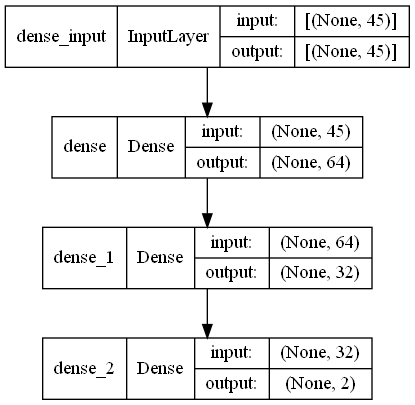

In [26]:
from keras.utils.vis_utils import plot_model
plot_model(loadModel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [27]:
pred = loadModel.predict(X_recieved)
pred

array([[0., 1.]], dtype=float32)

In [28]:
y_pred = loadModel.predict(x_test_scaled,64)
y_pred = np.argmax(y_pred,axis = 1)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [29]:
# confusion matrix
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[19415    74]
 [   12 25648]]


<AxesSubplot:>

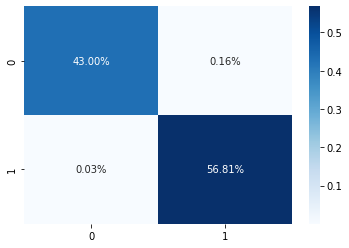

In [30]:
# heatmap of confusion matrix
import seaborn as sns
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [31]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.9971230852966332

In [32]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.9995323460639127

In [33]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9983262621151375

In [34]:
# SMS service
import requests
import base64
import os
from dotenv import load_dotenv

if(pred[0][1] == 1):  # 1 - ddos     0 - benign
  load_dotenv()
  appId = os.getenv('APPID')
  accessKey = os.getenv('ACCESSKEY')
  accessSecret = os.getenv('ACCESSSECRET')
  projectId = os.getenv('PROJECTID')
  channel = "SMS"
  identity = "+918792884722"
  url = "https://us.conversation.api.sinch.com/v1/projects/" + projectId + "/messages:send"

  data = accessKey + ":" + accessSecret
  encodedBytes = base64.b64encode(data.encode("utf-8"))
  accessToken = str(encodedBytes, "utf-8")

  payload = {
    "app_id": appId,
    "recipient": {
        "identified_by": {
            "channel_identities": [
              {
                  "channel": channel,
                  "identity": identity
              }  
              ]
        }
    },
    "message": {
        "text_message": {
            "text": "Ddos Attack Detected. Kindly take necessary action."
        }
    }  
  }

  headers = {
    "Content-Type": "application/json",
    "Authorization": "Basic " + accessToken
  }

  response = requests.post(url, json=payload, headers=headers)

  data = response.json()
  print(data)

{'message_id': '01GHTW8M0F9SK31Q8J1T1FMVHW', 'accepted_time': '2022-11-14T10:51:50.671Z'}


In [ ]:
# Email service

import smtplib

if(pred[0][1] == 1):
    # creates SMTP session
    s = smtplib.SMTP('smtp.gmail.com', 587)
    
    # start TLS for security
    s.starttls()
    
    # Authentication
    s.login("adigupta239@gmail.com", "mxwzguwzdcxcrqdw")
    
    # message to be sent
    subject = "Suspicious activity detected on your network"
    text = 'Dear user, our model have detected some malicious traffic on your network which could be a possible attempt of a DDOS attack. You can perform the following action :\n \n 1.Disconnect all your devices from the network.\n 2.Check if any unknown software is installed on your device. \n 3.Contact a security personnel ASAP. \n  \nHope you find this alert helpful and took the action at right time.'

    message = 'Subject: {}\n\n{}'.format(subject, text)

    # sending the mail
    s.sendmail("adigupta239@gmail.com", "arcyjain2002@gmail.com", message)
    
    # terminating the session
    s.quit()